Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Loading required package: expsmooth

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: tseries




Call:
lm(formula = log_sales ~ time + month + surfing, data = fancy_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33673 -0.12757  0.00257  0.10911  0.37671 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.174e+02  1.974e+01 -26.207  < 2e-16 ***
time         2.642e-01  9.921e-03  26.634  < 2e-16 ***
month2       2.514e-01  9.568e-02   2.628 0.010555 *  
month3       2.661e-01  1.934e-01   1.376 0.173275    
month4       3.841e-01  9.571e-02   4.013 0.000148 ***
month5       4.095e-01  9.573e-02   4.277 5.88e-05 ***
month6       4.488e-01  9.577e-02   4.687 1.33e-05 ***
month7       6.105e-01  9.580e-02   6.372 1.71e-08 ***
month8       5.880e-01  9.585e-02   6.134 4.53e-08 ***
month9       6.693e-01  9.590e-02   6.979 1.36e-09 ***
month10      7.474e-01  9.596e-02   7.788 4.48e-11 ***
month11      1.207e+00  9.603e-02  12.566  < 2e-16 ***
month12      1.962e+00  9.611e-02  20.417  < 2e-16 ***
surfing      5.015e-01  1.964e-01   2.

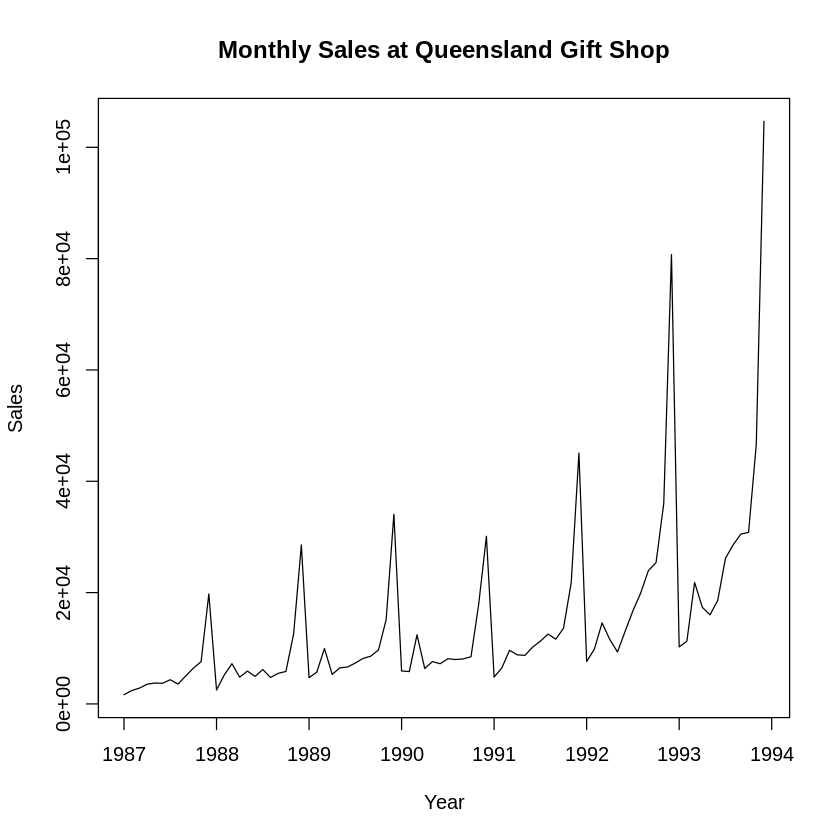

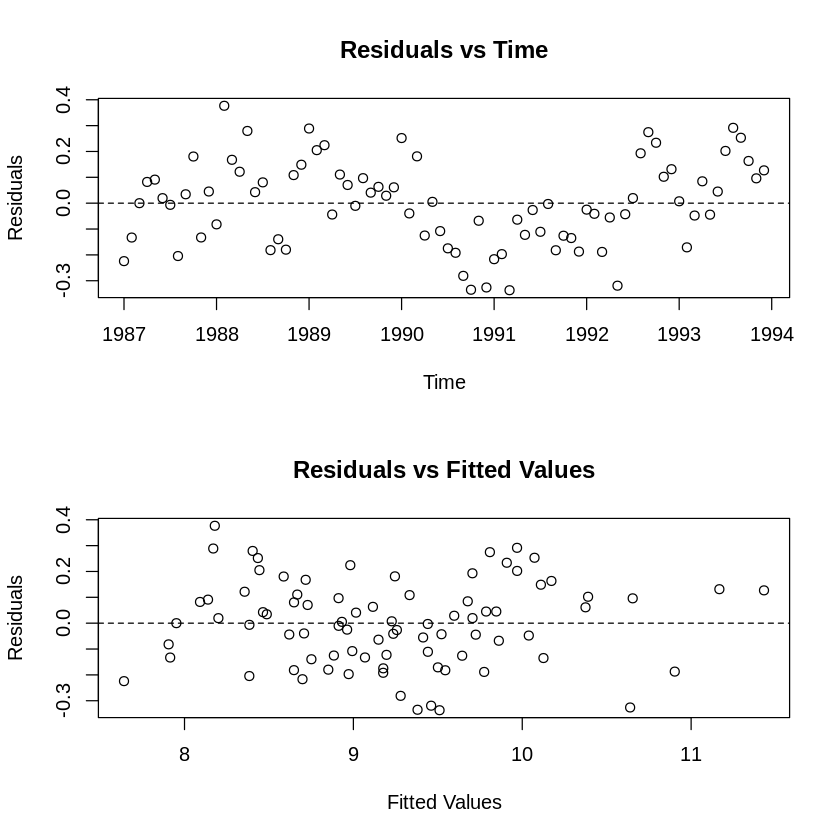


	Breusch-Godfrey test for serial correlation of order up to 1

data:  model
LM test = 25.031, df = 1, p-value = 5.642e-07



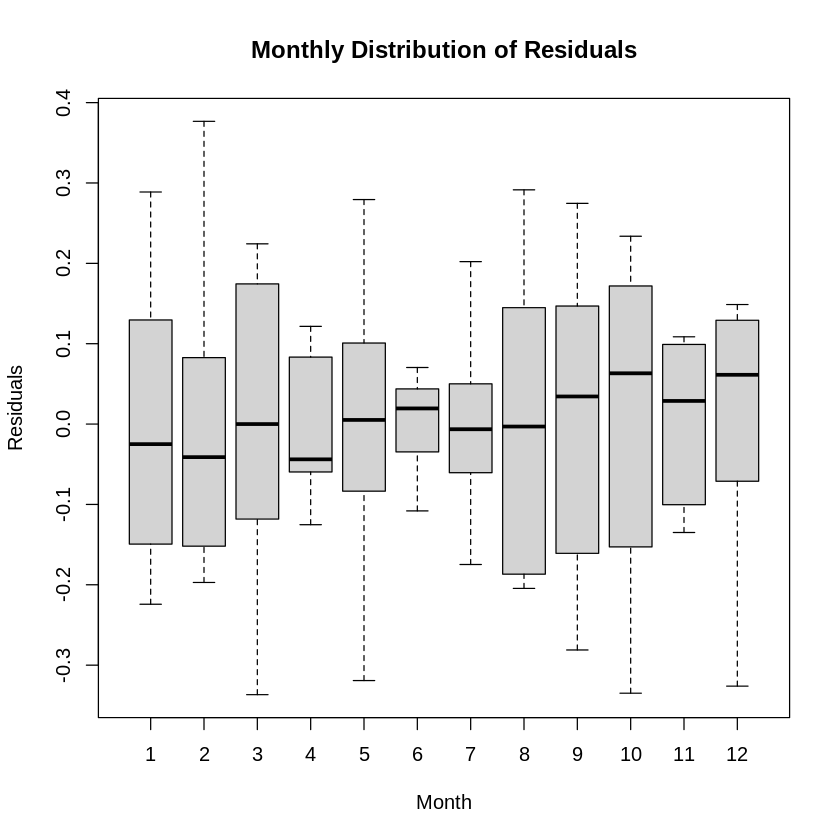

,fit,lwr,upr
1,13244.70,8969.583,19557.43
2,17289.74,11710.200,25527.76
3,29411.73,19881.978,43509.25
4,20347.31,13783.929,30035.91
5,21188.98,14355.585,31275.14
6,22374.50,15160.327,33021.60


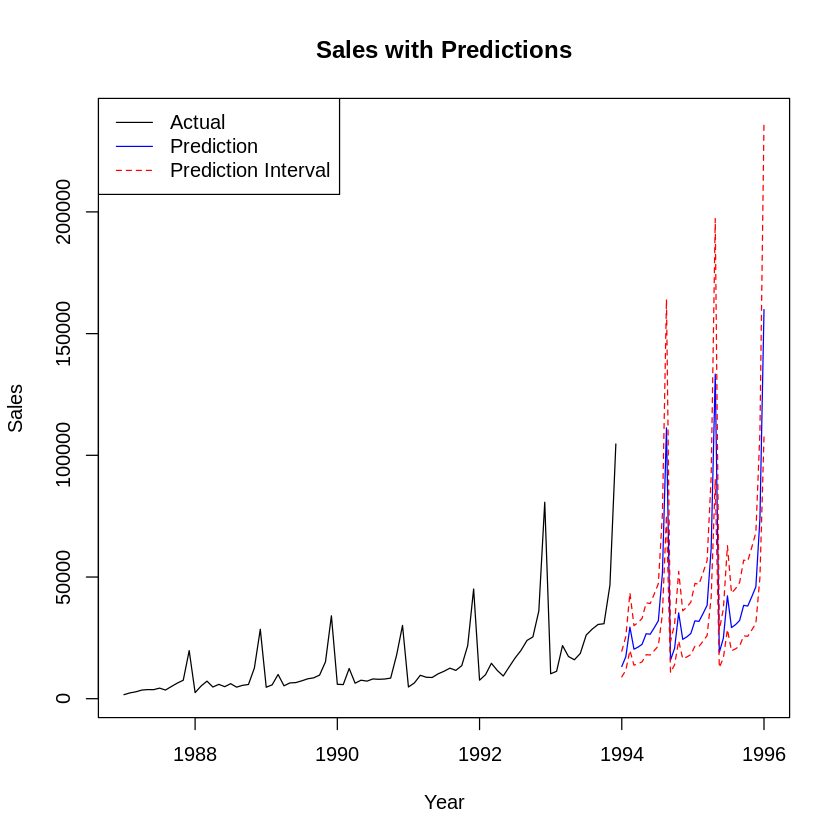

In [ ]:

library(fpp)

data(fancy)

# 1. Time plot
plot(fancy, main="Monthly Sales at Queensland Gift Shop",
     xlab="Year", ylab="Sales")

# Create a data frame for analysis
fancy_df <- data.frame(
  sales = as.numeric(fancy),
  time = as.numeric(time(fancy)),
  month = factor(cycle(fancy))
)

# Add surfing festival dummy (March 1988 onwards)
fancy_df$surfing <- ifelse(fancy_df$month == 3 &
                          fancy_df$time >= 1988, 1, 0)

# 2. Log transform
fancy_df$log_sales <- log(fancy_df$sales)

# 3. Fit the regression model
model <- lm(log_sales ~ time + month + surfing, data = fancy_df)
summary(model)

# 4. Diagnostic plots
par(mfrow = c(2,1))
# Residuals vs Time
plot(fancy_df$time, residuals(model),
     main="Residuals vs Time",
     xlab="Time", ylab="Residuals")
abline(h=0, lty=2)

# Residuals vs Fitted
plot(fitted(model), residuals(model),
     main="Residuals vs Fitted Values",
     xlab="Fitted Values", ylab="Residuals")
abline(h=0, lty=2)

# 5. Monthly boxplots of residuals
par(mfrow = c(1,1))
boxplot(residuals(model) ~ fancy_df$month,
        main="Monthly Distribution of Residuals",
        xlab="Month", ylab="Residuals")

# 7. Breusch-Godfrey test
bg <- bgtest(model)
print(bg)

# 8 & 9. Predictions for 1994-1996
# Create new data for predictions
new_times <- seq(1994, 1996, length=36)
new_months <- factor(rep(1:12, 3))
new_surfing <- ifelse(new_months == 3, 1, 0)

new_data <- data.frame(
  time = new_times,
  month = new_months,
  surfing = new_surfing
)

# Generate predictions on log scale
predictions <- predict(model, new_data, interval="prediction")

# Transform back to original scale
raw_predictions <- exp(predictions)

# Plot original data with predictions
plot(fancy, xlim=c(1987, 1996), ylim=c(min(fancy), max(raw_predictions)),
     main="Sales with Predictions", xlab="Year", ylab="Sales")
lines(new_times, raw_predictions[,"fit"], col="blue")
lines(new_times, raw_predictions[,"lwr"], col="red", lty=2)
lines(new_times, raw_predictions[,"upr"], col="red", lty=2)
legend("topleft", legend=c("Actual", "Prediction", "Prediction Interval"),
       col=c("black", "blue", "red"), lty=c(1,1,2))

# Display the first few predictions
head(raw_predictions)

In [ ]:
install.packages("fpp")
install.packages("fpp2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘fracdiff’, ‘timeDate’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘quadprog’, ‘quantmod’, ‘forecast’, ‘fma’, ‘expsmooth’, ‘lmtest’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



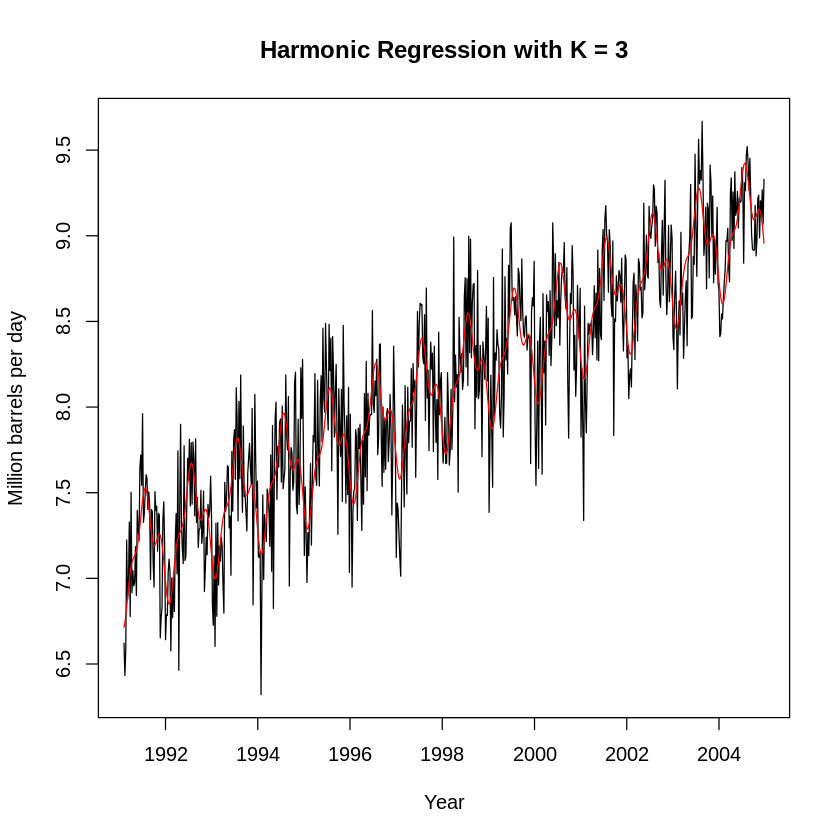

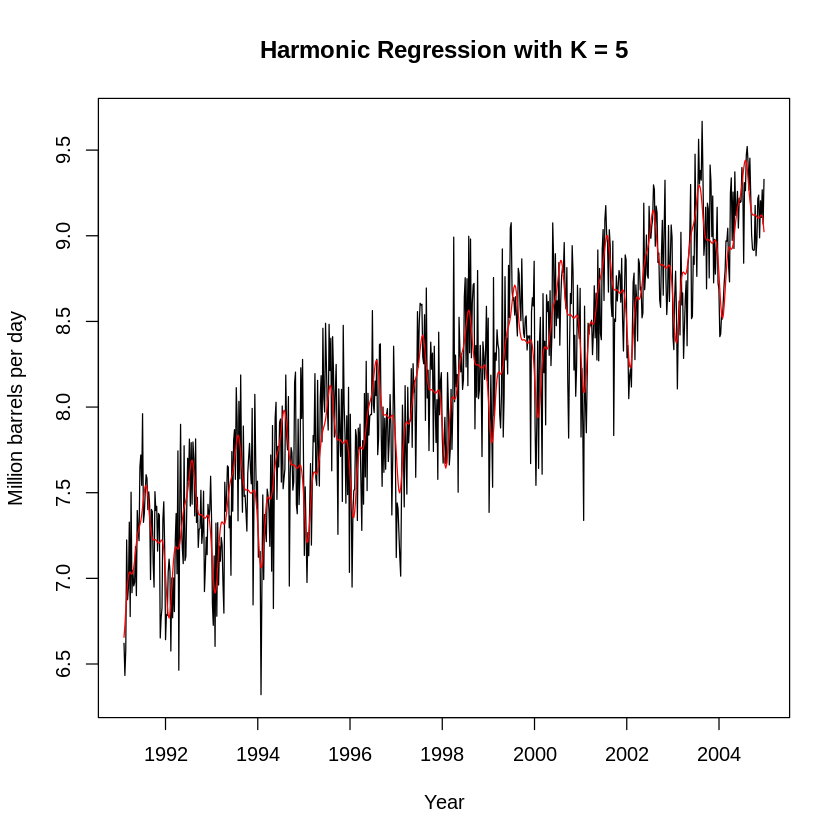

[1] "AIC values for different K:"
  K      AIC
1 3 195.9708
2 5 186.2582
3 7 146.2944
[1] "Best K based on AIC: 7"


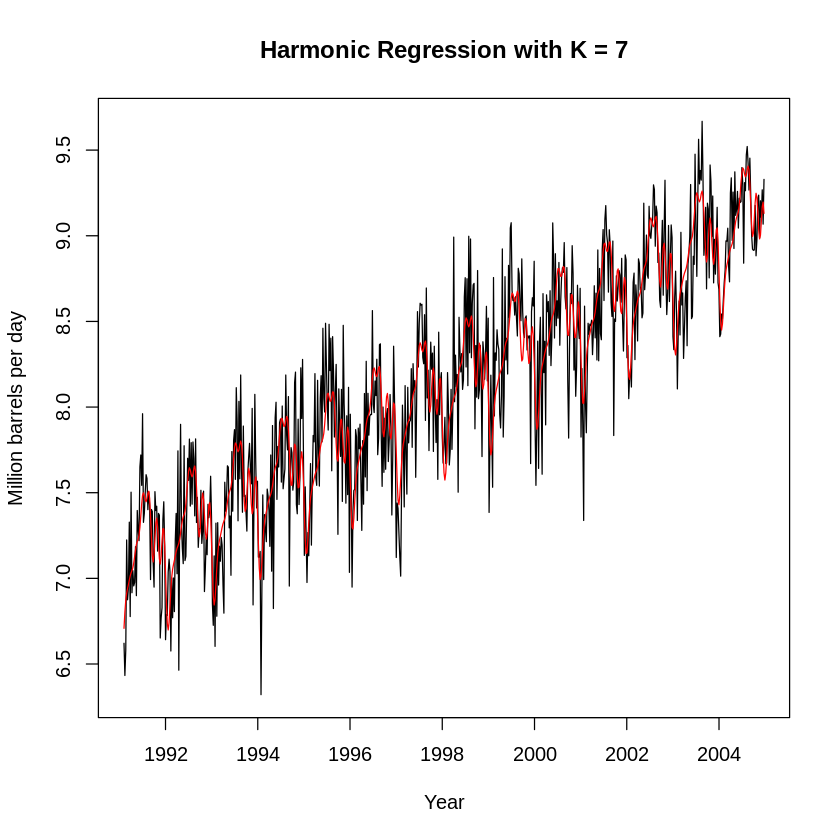


	Breusch-Godfrey test for serial correlation of order up to 104

data:  Residuals from Linear regression model
LM test = 149.35, df = 104, p-value = 0.002388


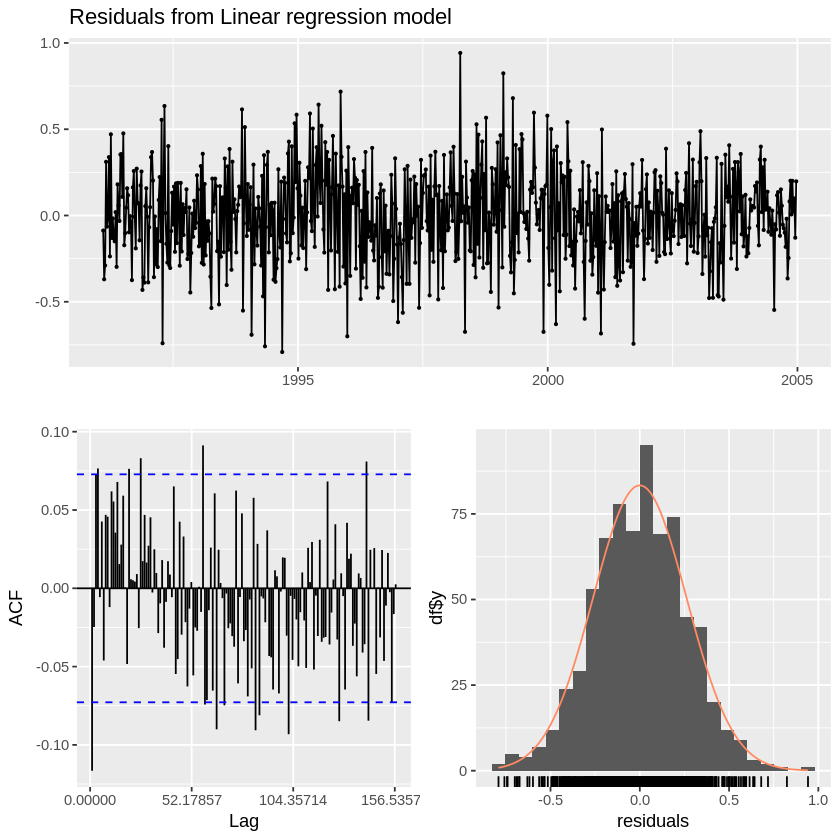

[1] "Forecast accuracy metrics:"
                        ME      RMSE       MAE        MPE     MAPE      MASE
Training set -2.450476e-17 0.2614547 0.2083338 -0.1091709 2.606577 0.6371092
Test set     -5.058711e-02 0.2085314 0.1469740 -0.5804762 1.624752 0.4494637
                   ACF1 Theil's U
Training set -0.1164963        NA
Test set      0.7531510  1.512801


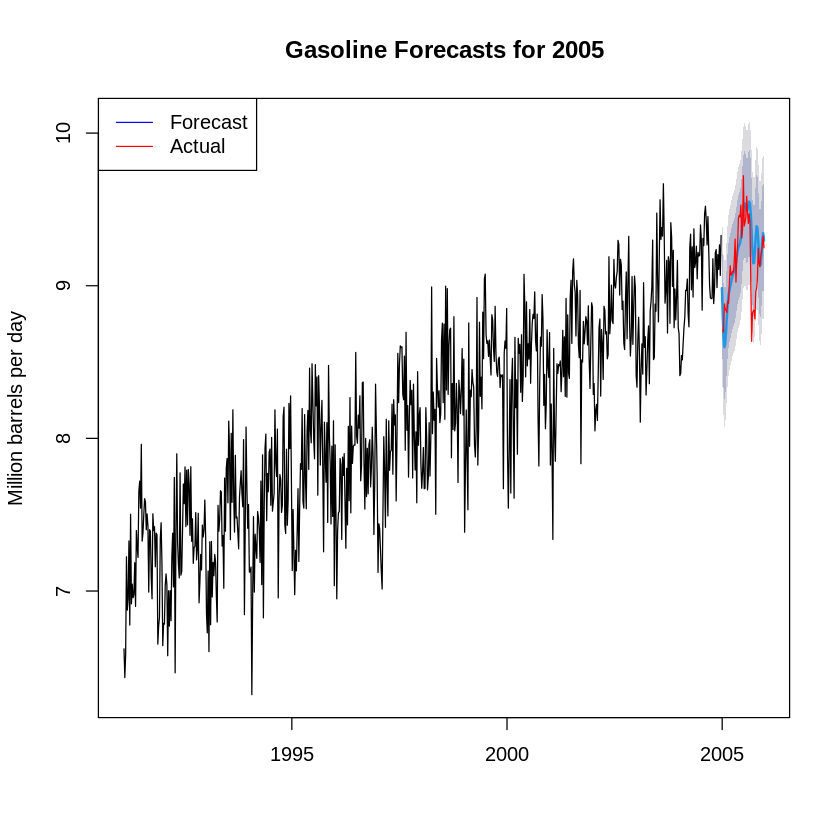

In [ ]:
# Load required packages
library(fpp2)
library(forecast)
library(ggplot2)

# Load and prepare data
data(gasoline)
gas <- window(gasoline, end=c(2004,52))

# 1. Fit models with different K values
# K=3
K <- 3
fit1 <- tslm(gas ~ trend + fourier(gas, K))
plot(gas, main=paste("Harmonic Regression with K =", K),
     ylab="Million barrels per day", xlab="Year")
lines(fitted(fit1), col="red")

# K=5
K <- 5
fit2 <- tslm(gas ~ trend + fourier(gas, K))
plot(gas, main=paste("Harmonic Regression with K =", K),
     ylab="Million barrels per day", xlab="Year")
lines(fitted(fit2), col="red")

# K=7
K <- 7
fit3 <- tslm(gas ~ trend + fourier(gas, K))
plot(gas, main=paste("Harmonic Regression with K =", K),
     ylab="Million barrels per day", xlab="Year")
lines(fitted(fit3), col="red")

# 2. Compare AIC values
aic_values <- c(AIC(fit1), AIC(fit2), AIC(fit3))
k_values <- c(3, 5, 7)
aic_df <- data.frame(K = k_values, AIC = aic_values)
print("AIC values for different K:")
print(aic_df)
best_K <- k_values[which.min(aic_values)]
print(paste("Best K based on AIC:", best_K))

# Use the best K for final model
final_fit <- tslm(gas ~ trend + fourier(gas, best_K))

# 3. Check residuals
checkresiduals(final_fit)

# 4 & 5. Generate and plot forecasts
h <- 52  # forecast horizon (one year)
# Create future fourier terms
future_fourier <- fourier(gas, K=best_K, h=h)
# Generate forecasts
fc <- forecast(final_fit, newdata=data.frame(future_fourier))

# Get actual 2005 data for comparison
gas_2005 <- window(gasoline, start=c(2005,1), end=c(2005,52))

# Plot forecasts and actual values
plot(fc, main="Gasoline Forecasts for 2005",
     ylab="Million barrels per day")
lines(gas_2005, col="red")
legend("topleft", legend=c("Forecast", "Actual"),
       col=c("blue", "red"), lty=1)

# Print forecast accuracy
print("Forecast accuracy metrics:")
accuracy_metrics <- accuracy(fc, gas_2005)
print(accuracy_metrics)

In [ ]:
install.packages("AICcmodavg")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘lme4’, ‘TMB’, ‘RcppEigen’, ‘unmarked’, ‘VGAM’




In [ ]:
install.packages(c("fpp2", "forecast", "ggplot2"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

